# Clustering: k-Medoids

In this lab tasks we implement k-Medoids algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We start with generating synthetic dataset consisting of four clusters.

In [2]:
N = 100

#Generate dataset
np.random.seed(844)
clust1 = np.random.normal(5, 2, (N,2))
clust2 = np.random.normal(15, 2, (N,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], N)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], N)
dataset = np.concatenate((clust1, clust2, clust3, clust4))

#Create an array that stores cluster IDs of every object in our dataset
#We will use the index of a medoid as a cluster ID
clusters = np.zeros((len(dataset),1))

In [3]:
def cluster_plots(dataset, medoidInd=[], colours = 'gray', title = 'Dataset'):
    fig,ax = plt.subplots()
    fig.set_size_inches(12, 12)
    ax.set_title(title,fontsize=14)
    ax.set_xlim(min(dataset[:,0]), max(dataset[:,0]))
    ax.set_ylim(min(dataset[:,1]), max(dataset[:,1]))
    ax.scatter(dataset[:, 0], dataset[:, 1],s=8,lw=1,c= colours)

    #Plot medoids if they are given
    if len(medoidInd) > 0:
        ax.scatter(dataset[medoidInd, 0], dataset[medoidInd, 1],s=8,lw=6,c='red')
    fig.tight_layout()
    plt.show()

Let's plot our dataset

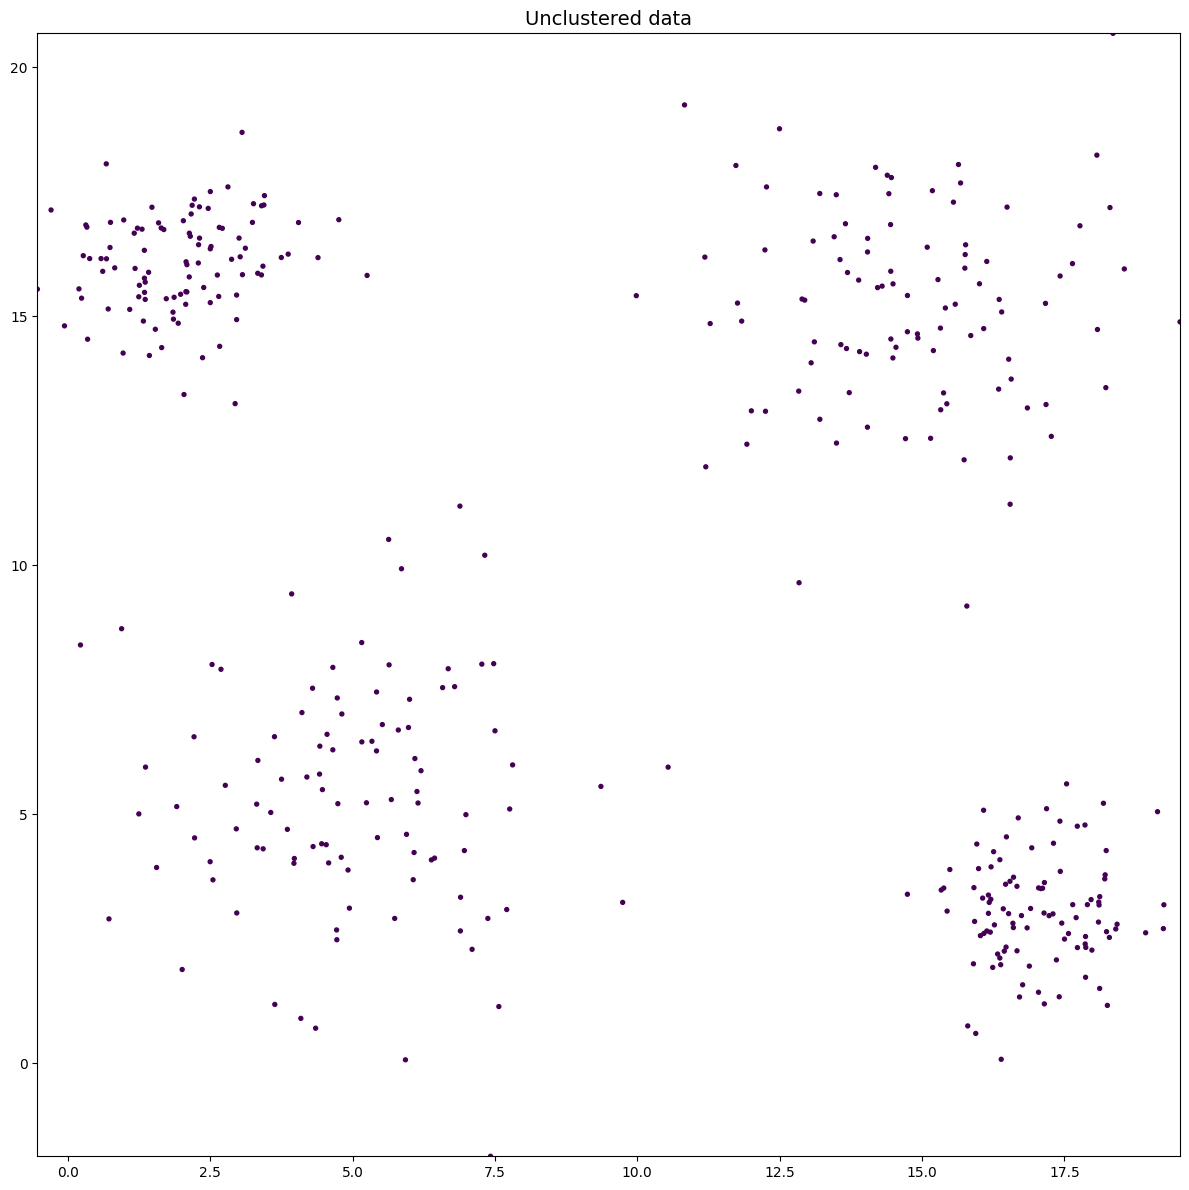

In [4]:
cluster_plots(dataset, colours=clusters, title='Unclustered data')

## Exercise 1

Implement k-medoids algorithm. Use the Euclidean distance as the dissimilarity measure.

In [5]:
def distance(X,Y):
    #Return the Euclidean distance between X and Y
    return np.linalg.norm(X-Y)

In [6]:
#Given dataset and indices of medoids, the function updates the clusters of the objects in the dataset
def assign(medoidsInd, dataset, clusters):
    numOfObjects = len(dataset)
    k = len(medoidsInd)
    
    #for every object in the dataset
    for i in range(numOfObjects):
        X = dataset[i]
        #find the closest medoid
        medoidIndOfX = -1;
        distanceToClosestMedoid = np.Inf;
        for index in medoidsInd:
            currentMedoid = dataset[index]
            dist = distance(X, currentMedoid)
            if dist < distanceToClosestMedoid:
                #Found closer medoid. Store information about it
                distanceToClosestMedoid = dist
                medoidIndOfX = index
        #assign to X its closest medoid
        clusters[i] = int(medoidIndOfX)

In [7]:
#Compute the objective fuction for the given dataset and the set of medoids
def objectiveFunc(medoidsInd, dataset):
    numOfObjects = len(dataset)
    
    clusters = np.zeros((len(dataset),1))
    
    #assign objects to closest medoids
    assign(medoidsInd, dataset, clusters)
    
    #compute the objective function: the total sum of distances from objects to their medoids
    obj = 0
    for i in range(numOfObjects):
        obj = obj + distance(dataset[i,:-1], dataset[int(clusters[i]),:-1])
    
    return obj

In [8]:
def kMedoids(k, dataset, clusters, maxIter=10):
    numOfObjects = len(dataset)
    
    ###Initialisation phase
    #Generate indices for initial medoids
    np.random.seed(45)
    medoidsInd = np.random.choice(numOfObjects, k, replace=False)

    #Make initial assignment of objects to the clusters
    assign(medoidsInd, dataset,clusters)
    
    #plot initial assignment
    cluster_plots(dataset, medoidsInd, clusters, title='Initial cluster assignment')
    
    ###Optimisation+Initialisation phases
    #Create temporary arrays with cluster and medoid indices for optimisation purposes
    tempClusters = np.copy(clusters)
    tempMedoidsInd = np.copy(medoidsInd)
    bestObjective = objectiveFunc(tempMedoidsInd, dataset)
    print('Initial objective function: %.2f' % bestObjective, ';    Initial medoid indices: ', medoidsInd)
    isObjectiveImproved = False

    
    for i in range(maxIter):
        isObjectiveImproved = False
        bestPair = np.zeros(2)
        #for each pair of (x,Y) where Y is a medoid and X is a non-medoid object from the dataset
        for y in range(k):
            for x in range(numOfObjects):
                if not x in tempMedoidsInd:
                    #put X into the set of medoids and instead of Y
                    tempMedoidsInd[y] = x
                    #and compute the value of the objective function for the new set of medoids
                    tempObjective = objectiveFunc(tempMedoidsInd, dataset)
                    #if the objective improved
                    if tempObjective < bestObjective:
                        #then update current best pair (X,Y) and current best objective
                        isObjectiveImproved = True
                        bestPair[0] = int(x);
                        bestPair[1] = int(y);
                        bestObjective = tempObjective
                    tempMedoidsInd[y] = medoidsInd[y]
        #If the objectvie function has improved in the current iteration, then
        if isObjectiveImproved:
            #update the set of medoids according to the best pair (X,Y)
            medoidsInd[int(bestPair[1])] = bestPair[0];
            #reassign objects to new medoids
            assign(medoidsInd, dataset, clusters)
            bestObjective = objectiveFunc(medoidsInd, dataset)
            #and plot the current clustering
            cluster_plots(dataset, medoidsInd, clusters, title='Clustering improvement')
            print('Objective function: %.2f' % bestObjective, ';    Medoid indices: ', medoidsInd)
        else:
            #otherwise stop clustering (we reached a local optimum)
            break

## Exercise 2

1. Apply the implemented k-medoids algorithm to the generated dataset with the parameter k=4.
2. For every iteration of the algorithm  
    - output the current value of the objective function
    - output the indices of the current medoid objects
    - plot the clustering together with medoids

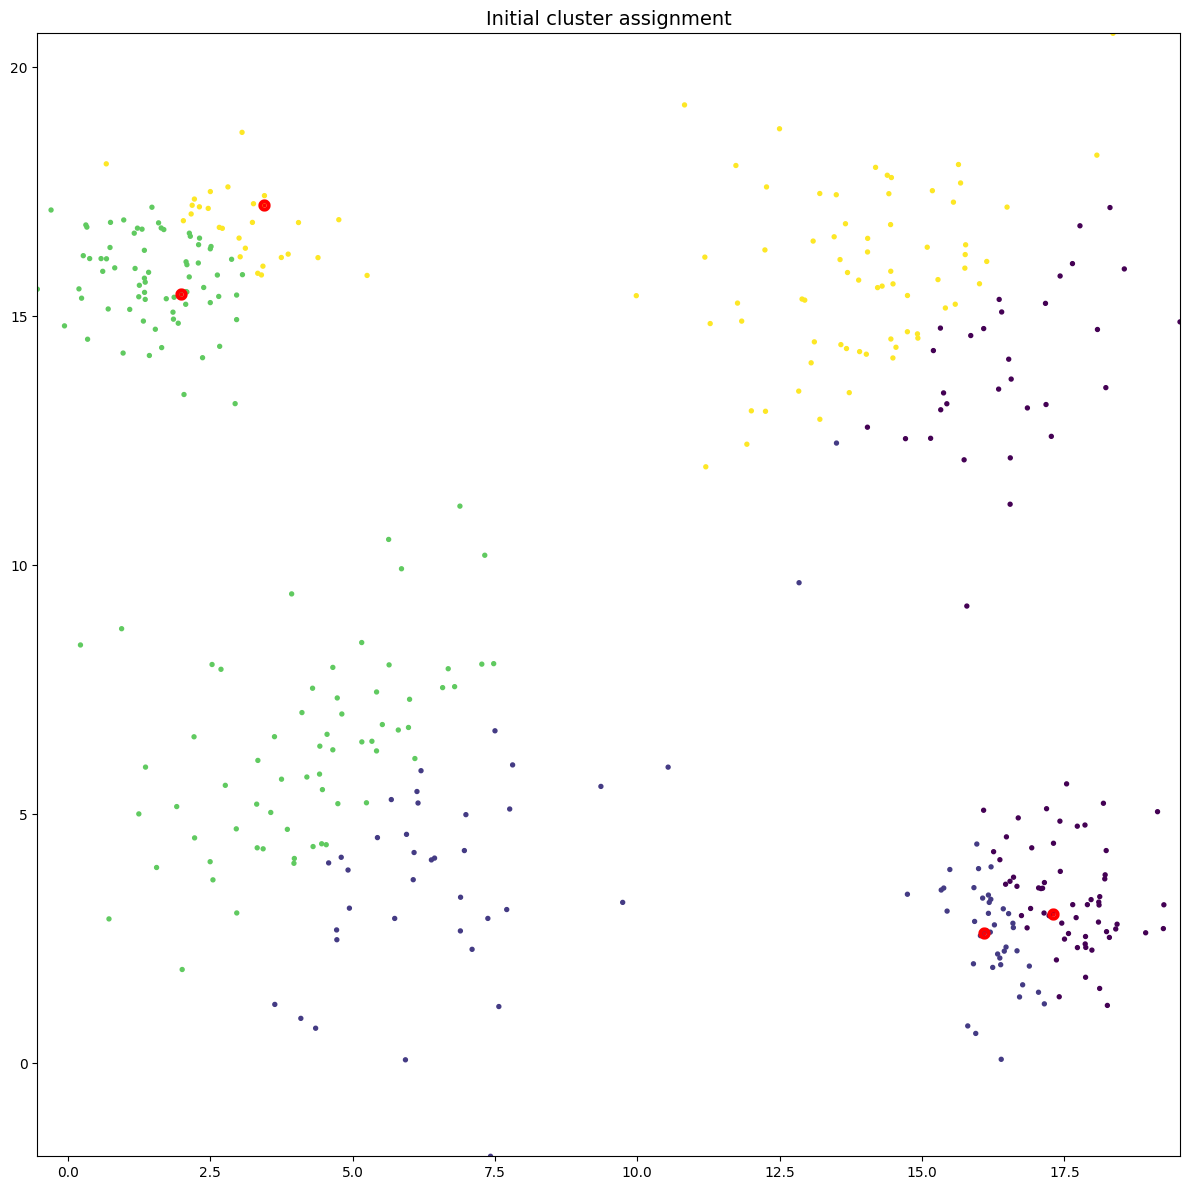

C:\Users\isrya\AppData\Local\Temp\ipykernel_14348\4035120905.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obj = obj + distance(dataset[i,:-1], dataset[int(clusters[i]),:-1])


Initial objective function: 1375.93 ;    Initial medoid indices:  [255 346 228 384]


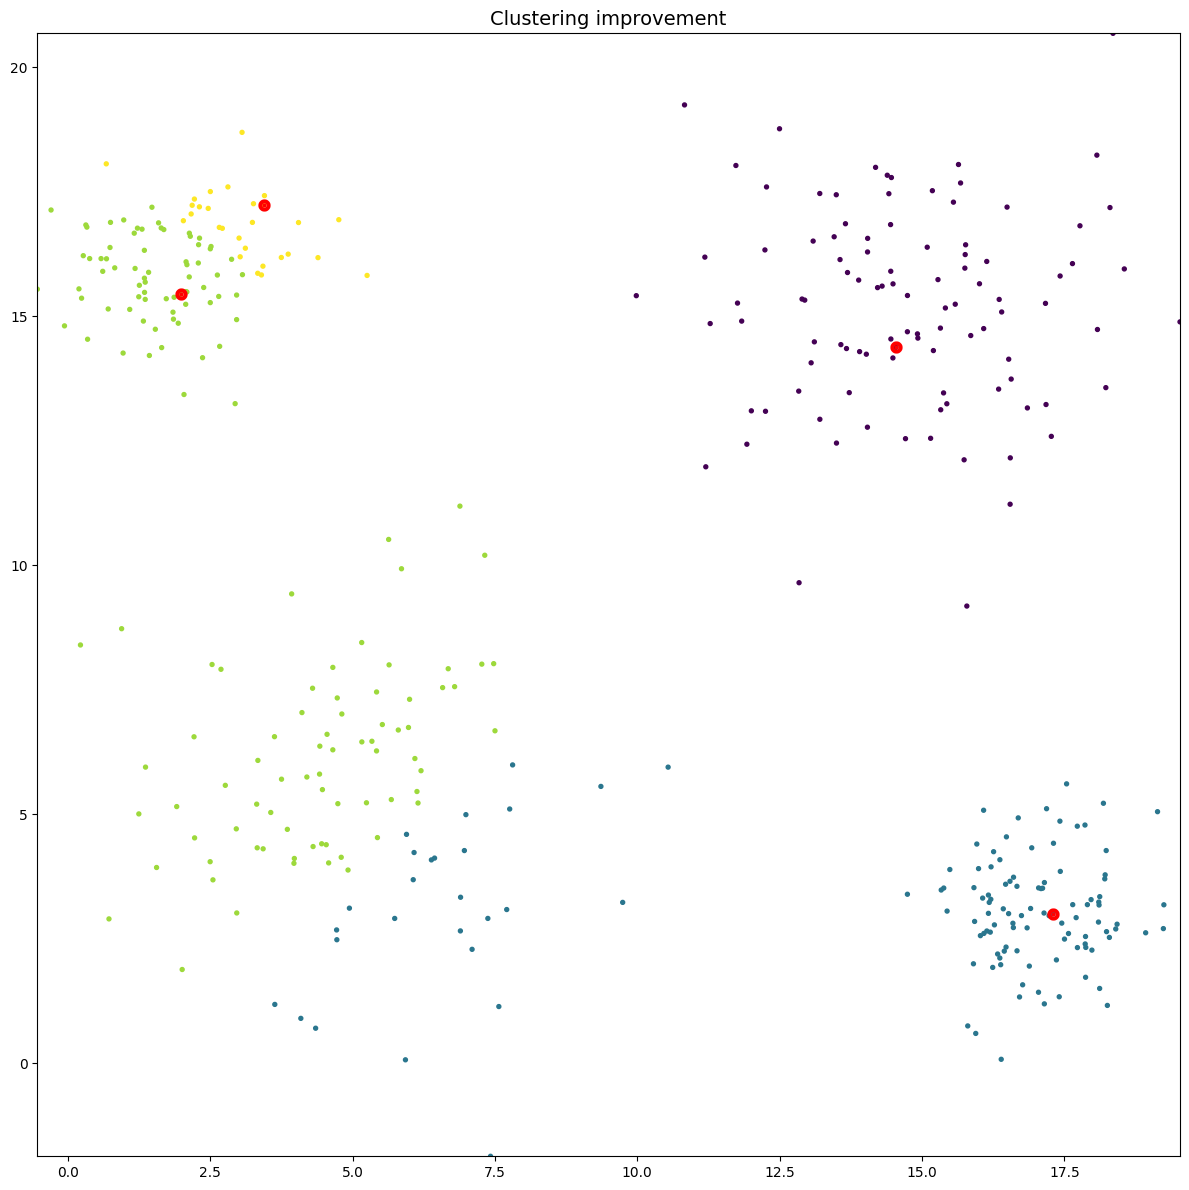

Objective function: 787.34 ;    Medoid indices:  [127 346 228 384]


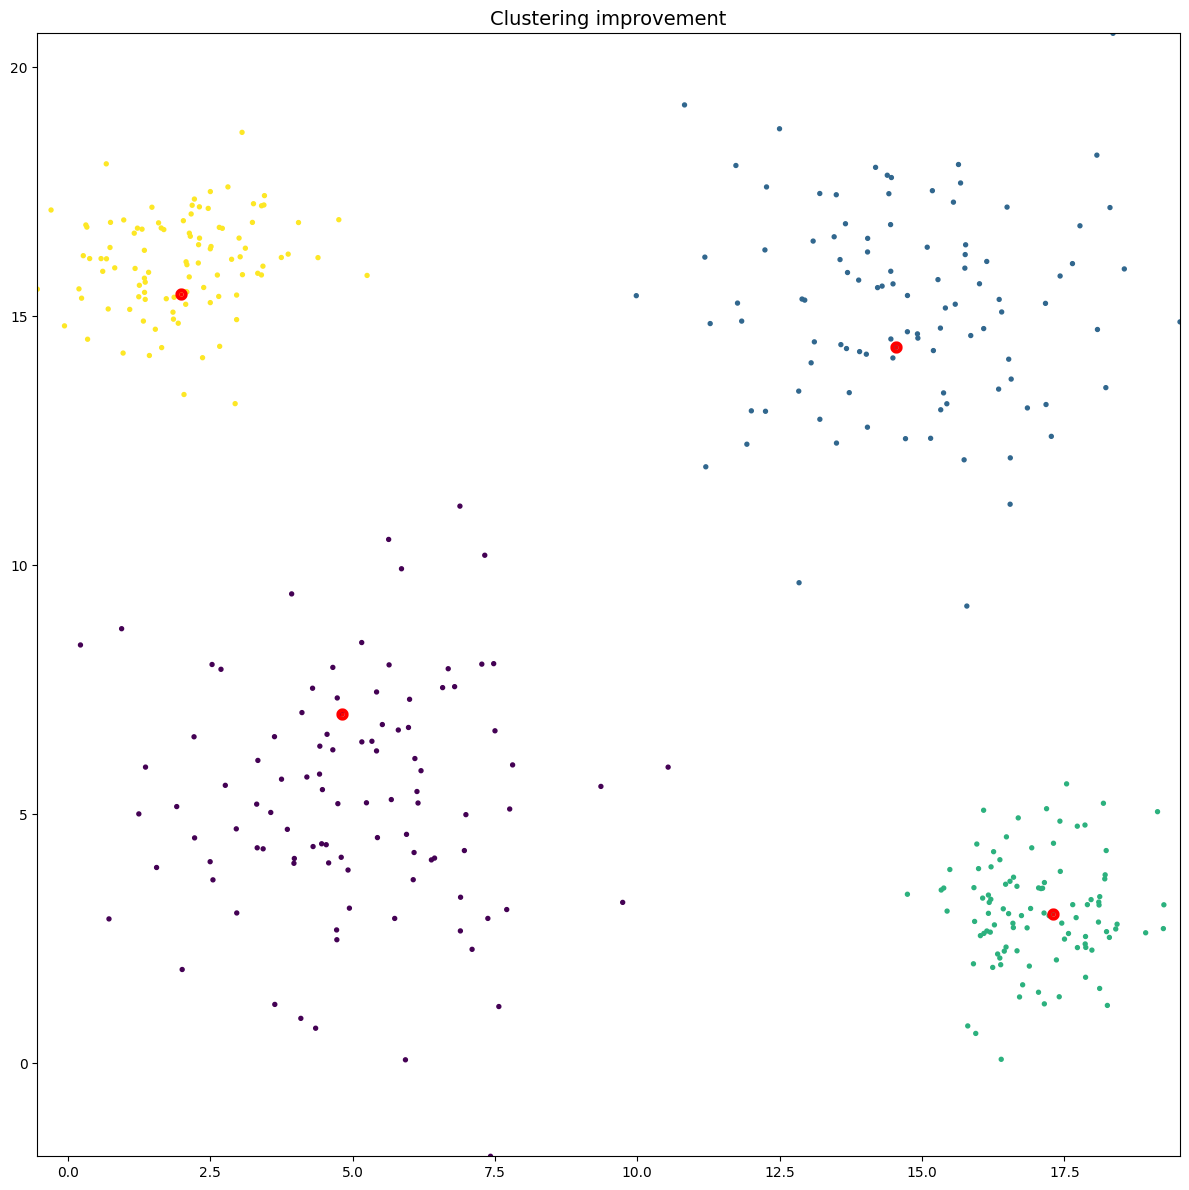

Objective function: 482.38 ;    Medoid indices:  [127 346 228  20]


In [9]:
kMedoids(4,dataset,clusters)